In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from calendar import monthrange
from datetime import date

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\All\\"
salt_type = 'None'
building_id = 365

In [11]:
# Read building data:
load = pd.read_excel(ResultsFolder + "Results__includeTES_True_month_Year_NEEP50_Building_id_" + str(building_id)+".xlsx", sheet_name="load")
load = load.rename(columns={'Unnamed: 0': 'Hour'})
temp = pd.read_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\ext_temp.xlsx")
load['Outdoor Temp'] = temp['MI C']

tes_discharge = pd.read_excel(ResultsFolder + "Results__includeTES_True_month_Year_NEEP50_Building_id_" + str(building_id)+".xlsx", sheet_name="TES")
hp_l = pd.read_excel(ResultsFolder + "Results__includeTES_True_month_Year_NEEP50_Building_id_" + str(building_id)+".xlsx", sheet_name="HP output")
pur_elec = pd.read_excel(ResultsFolder + "Results__includeTES_True_month_Year_NEEP50_Building_id_" + str(building_id)+".xlsx", sheet_name="purchased electricity")

load['TES Discharge (kWh)'] = tes_discharge['TES discharge (kWh)']
load['HP to load (kWh)'] = hp_l['HP output to load (kWh)']
load['Purchased Electricity (kWh)'] = pur_elec['Unnamed: 1']
load['SOC (%)'] = tes_discharge['TES SOC (kWh)']/300
load = load.reset_index()
load['hour'] = load['index'] + 1
load

,index,Hour,Load (kWh),Outdoor Temp,TES Discharge (kWh),HP to load (kWh),Purchased Electricity (kWh),SOC (%),hour
0,0,hour 1,2.405041,-11.7,2.0,0.405041,0.180951,0.993197,1
1,1,hour 2,2.340557,-17.2,2.0,0.340557,0.340557,0.986395,2
2,2,hour 3,2.456886,-13.3,2.0,0.456886,0.211365,0.979592,3
3,3,hour 4,2.402808,-15.6,2.0,0.402808,0.218955,0.972789,4
4,4,hour 5,2.372352,-15.0,2.0,0.372352,0.183460,0.965986,5
...,...,...,...,...,...,...,...,...,...
8755,8755,hour 8756,0.870929,2.8,0.0,0.870929,0.860797,0.973333,8756
8756,8756,hour 8757,0.903430,3.9,0.0,0.903430,0.847074,0.980000,8757
8757,8757,hour 8758,0.951762,4.4,0.0,0.951762,0.850750,0.986667,8758
8758,8758,hour 8759,1.936835,3.9,0.0,1.936835,1.148569,0.993333,8759


0.3841777844445802

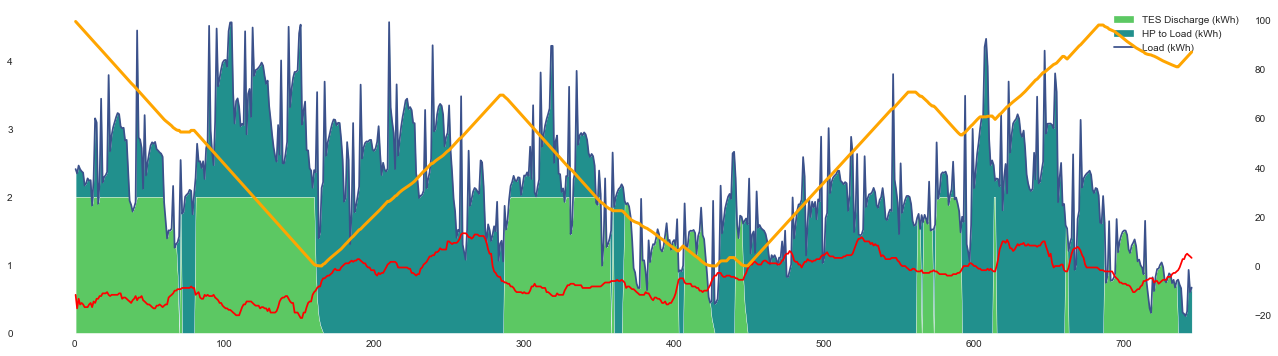

In [13]:
# Graphing:
mon_to_run = 1
year = 2018

if mon_to_run == 'Year':
    day = 365                                   # Equivalent days
    starting_day = 0
else:
    day = monthrange(year, mon_to_run)[1]       # number of days in specified month
    starting_day = (date(year, mon_to_run, 1) - date(year, 1, 1)).days

hour = day * 24
starting_hour = starting_day * 24
end_hour = starting_hour + hour
starting_hour

load_truncated = load.truncate(before=starting_hour, after=end_hour)
import seaborn as sns
plt.style.use("seaborn")
colors = sns.color_palette("viridis_r", 3)
sns.set_style(style='white')
labels=["TES Discharge (kWh)", "HP to Load (kWh)"]

fig, ax1 = plt.subplots(figsize=(22,6))
plt.stackplot(load_truncated['hour'], load_truncated['TES Discharge (kWh)'], load_truncated['HP to load (kWh)'], labels=labels, colors=colors)
ax1.plot(load_truncated['hour'], load_truncated['Load (kWh)'], label = "Load (kWh)")


plt.legend(loc='upper right')
ax2 = ax1.twinx()
ax2.plot(load_truncated['hour'], load_truncated['Outdoor Temp'], label = "Outdoor Temp (Celcius)", color='red')
ax2.plot(load_truncated['hour'], load_truncated['SOC (%)']*100, label = "SOC (%)", color='orange',linewidth=3)

tes_discharge_trun = load_truncated['TES Discharge (kWh)'].sum()
load_trun = load_truncated['Load (kWh)'].sum()
tes_pct = tes_discharge_trun/load_trun
tes_pct

In [4]:
# Compare heat pump outputs:
hp = pd.read_excel(ResultsFolder + "Results__includeTES_False_month_Year_NEEP50_Building_id_" + str(building_id)+".xlsx", sheet_name="HP output")
hp_wTES = pd.read_excel(ResultsFolder + "Results__includeTES_True_month_Year_NEEP50_Building_id_" + str(building_id)+".xlsx", sheet_name="HP output")
hp['HP output total - w/TES (kWh)'] = hp_wTES['HP output total (kWh)']
hp['HP output to TES (kWh)'] = hp_wTES['HP output to TES (kWh)']
hp_truncated = hp.truncate(before=starting_hour, after=end_hour)
hp = hp.reset_index()
hp = hp.rename(columns={'index': 'hour'})
hp['hour'] = hp['hour'] + 1

hp_noTES = hp['HP output total (kWh)'].sum()
hp_TES = hp['HP output total - w/TES (kWh)'].sum()
ht_pct = hp_TES/hp_noTES
hp

,hour,Unnamed: 0,Unnamed: 1,HP output to load (kWh),HP output total (kWh),HP output total - w/TES (kWh),HP output to TES (kWh)
0,1,NaN,NaN,18.226712,18.226712,16.226712,0.0
1,2,NaN,NaN,16.987938,16.987938,14.987938,0.0
2,3,NaN,NaN,17.211558,17.211558,15.211558,0.0
3,4,NaN,NaN,17.015076,17.015076,15.015076,0.0
4,5,NaN,NaN,17.024729,17.024729,15.024729,0.0
...,...,...,...,...,...,...,...
8755,8756,NaN,NaN,10.927158,10.927158,12.927158,2.0
8756,8757,NaN,NaN,10.946176,10.946176,12.946176,2.0
8757,8758,NaN,NaN,11.004044,11.004044,13.004044,2.0
8758,8759,NaN,NaN,11.873651,11.873651,13.873651,2.0


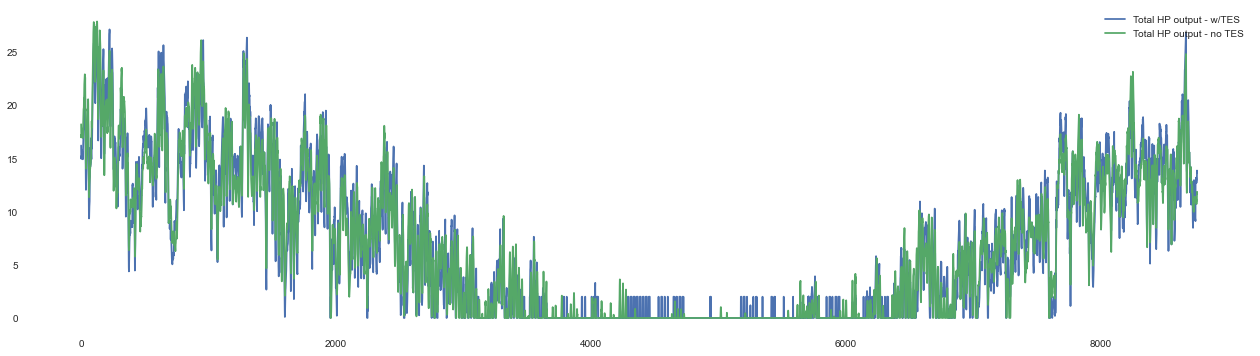

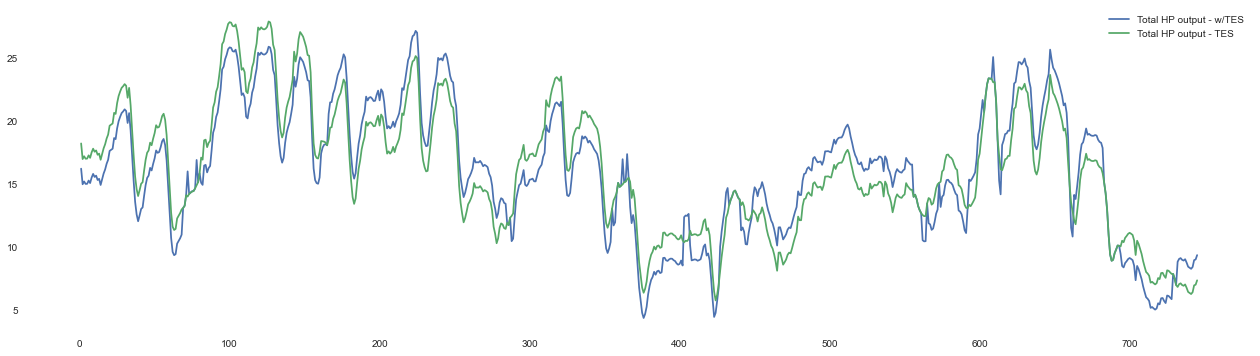

In [5]:
# Graph:
hp_truncated = hp.truncate(before=starting_hour, after=end_hour)

fig, ax = plt.subplots(figsize=(22,6))
#plt.plot(hp['hour'], load['Load (kWh)'], label='Load')
plt.plot(hp['hour'], hp['HP output total - w/TES (kWh)'], label='Total HP output - w/TES')
plt.plot(hp['hour'], hp['HP output total (kWh)'], label='Total HP output - no TES')
plt.legend(loc='upper right')

fig, ax = plt.subplots(figsize=(22,6))
#plt.plot(hp_truncated['hour'], load_truncated['Load (kWh)'], label='Load')
plt.plot(hp_truncated['hour'], hp_truncated['HP output total - w/TES (kWh)'], label='Total HP output - w/TES')
plt.plot(hp_truncated['hour'], hp_truncated['HP output total (kWh)'], label='Total HP output - TES')
plt.legend(loc='upper right')

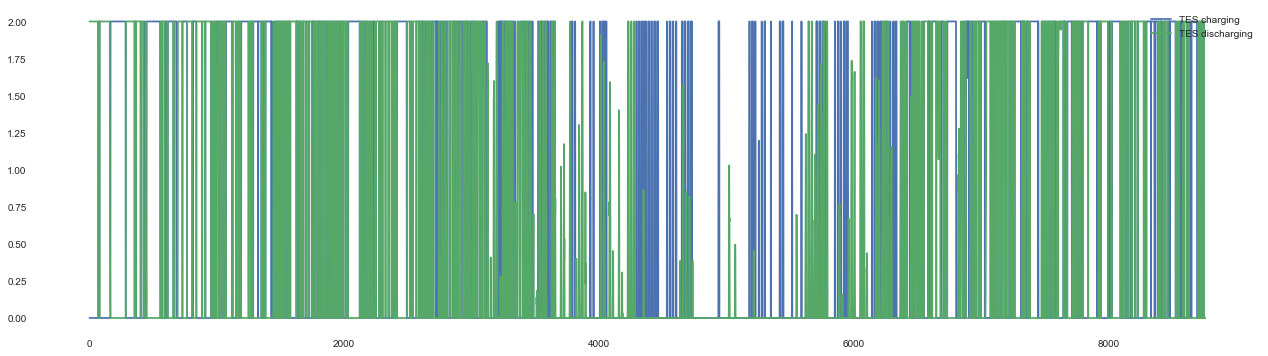

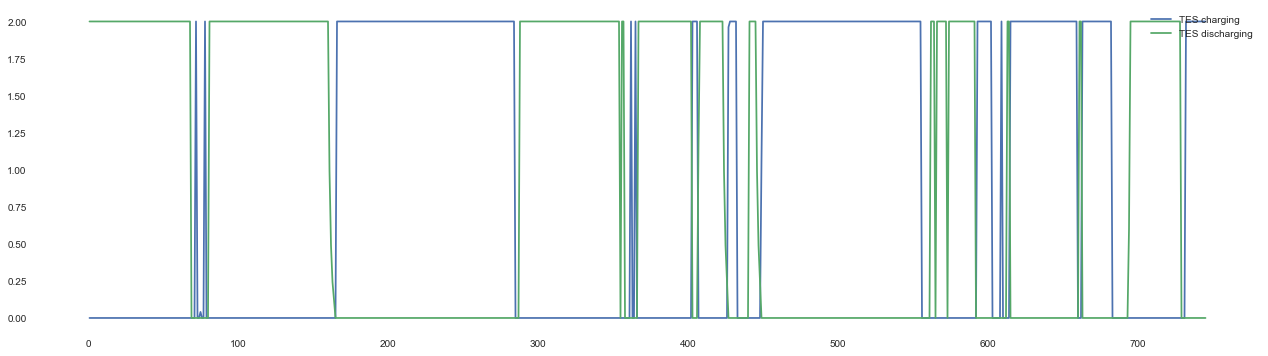

In [6]:
# TES charging vs discharging:
fig, ax = plt.subplots(figsize=(22,6))
#plt.plot(hp['hour'], load['Load (kWh)'], label='Load')
plt.plot(hp['hour'], hp['HP output to TES (kWh)'], label='TES charging')
plt.plot(hp['hour'], load['TES Discharge (kWh)'], label='TES discharging')
plt.legend(loc='upper right')

fig, ax = plt.subplots(figsize=(22,6))
#plt.plot(hp['hour'], load['Load (kWh)'], label='Load')
plt.plot(load_truncated['hour'], hp_truncated['HP output to TES (kWh)'], label='TES charging')
plt.plot(load_truncated['hour'], load_truncated['TES Discharge (kWh)'], label='TES discharging')
plt.legend(loc='upper right')